In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import random
import seaborn as sns

In [7]:
naives_bayes=MultinomialNB()
decision_tree=DecisionTreeClassifier()
folds=[2,4,6,8,10,12,14,16]
splits=[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
seed=6896#random.randint(0, 10000)
data="adult.data"
df = pd.read_csv(data)
#df.info()
#df.describe()
#print(df.head())
#print(df[['<=50K']].value_counts())
df.head()
# a = df.iloc[:,14]
# count=0
# count1=0

# for i in a:
#     if i==" <=50K":
#         count1+=1
#     #if i=='<=50K':
#     count+=1

# print(count-(count1))


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [66]:
replace_dict={}
for index,j in enumerate(df):
    count =0
    for i in set(df.iloc[:, index]):
        if(type(i)==str):
            replace_dict[i]=count
            count+=1
print(replace_dict)

{' State-gov': 0, ' Private': 1, ' ?': 0, ' Self-emp-inc': 3, ' Without-pay': 4, ' Never-worked': 5, ' Local-gov': 6, ' Federal-gov': 7, ' Self-emp-not-inc': 8, ' 1st-4th': 0, ' Some-college': 1, ' HS-grad': 2, ' Bachelors': 3, ' 12th': 4, ' Masters': 5, ' 9th': 6, ' Doctorate': 7, ' 5th-6th': 8, ' Assoc-acdm': 9, ' 10th': 10, ' Preschool': 11, ' Prof-school': 12, ' Assoc-voc': 13, ' 11th': 14, ' 7th-8th': 15, ' Married-spouse-absent': 0, ' Separated': 1, ' Never-married': 2, ' Divorced': 3, ' Married-civ-spouse': 4, ' Widowed': 5, ' Married-AF-spouse': 6, ' Craft-repair': 0, ' Transport-moving': 2, ' Exec-managerial': 3, ' Machine-op-inspct': 4, ' Handlers-cleaners': 5, ' Protective-serv': 6, ' Priv-house-serv': 7, ' Sales': 8, ' Prof-specialty': 9, ' Tech-support': 10, ' Adm-clerical': 11, ' Other-service': 12, ' Armed-Forces': 13, ' Farming-fishing': 14, ' Other-relative': 0, ' Not-in-family': 1, ' Wife': 2, ' Husband': 3, ' Unmarried': 4, ' Own-child': 5, ' Asian-Pac-Islander': 0, 

Load Dataset

In [67]:
classes = df.iloc[:, -1]
numeric_df = df.iloc[:,:-1].replace(replace_dict)
columns = df.columns.array[:-1]
class_values = set(classes)
numeric_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
0,50,8,83311,3,13,4,3,3,4,0,0,0,13,39
1,38,1,215646,2,9,3,5,1,4,0,0,0,40,39
2,53,1,234721,14,7,4,5,3,3,0,0,0,40,39
3,28,1,338409,3,13,4,9,2,3,1,0,0,40,3
4,37,1,284582,5,14,4,3,2,4,1,0,0,40,39


In [68]:

def classification_report_csv(report,mydata):
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        if len(row_data)==6:
            row['class'] = row_data[1]
            row['precision'] = row_data[2]
            row['recall'] = row_data[3]
            row['f1_score'] = row_data[4]
            row['support'] = row_data[5]
            mydata.append(row)

In [69]:
def print_model_evaluation(model, test_data, test_classes, class_values):
    predictions = model.predict(test_data)
    accuracy = accuracy_score(test_classes, predictions)
    print("Accuracy score: ",accuracy)
    confusion_mat = confusion_matrix(test_classes, predictions)
    print(confusion_mat)
    report = classification_report(test_classes, predictions, target_names=class_values, zero_division=0)
    print(report)
    return report


Split data

In [8]:
test_id = 1
decision_report=[]
naives_report=[]
for split_ratio in splits:
    (training_data, test_data, training_classes, test_classes) = train_test_split(
        numeric_df,
        classes,
        test_size=split_ratio,
        random_state=seed
    )
    print(f"Prueba {test_id}")
    print(f"Training data: {(1 - split_ratio) * 100}    Test data: {(split_ratio * 100)}")
    naive_bayes_model = naives_bayes.fit(training_data, training_classes)
    decision_tree_model = decision_tree.fit(training_data, training_classes) 
    print("Decision tree report")
    tree_text = export_text(decision_tree_model, feature_names=columns)
    #print(tree_text)
    decision_report1 = print_model_evaluation(decision_tree_model, test_data, test_classes, class_values)
    decision_report2=classification_report_csv(decision_report1,decision_report)
    print("Naive Bayes report")
    naives_report1=print_model_evaluation(naive_bayes_model, test_data, test_classes, class_values)
    naives_report2=classification_report_csv(naives_report1,naives_report)

    test_id += 1
dataframe = pd.DataFrame.from_dict(naives_report)
dataframe.to_csv('naives_report.csv', index = False)
dataframe = pd.DataFrame.from_dict(decision_report)
dataframe.to_csv('decision_report.csv', index = False)

NameError: name 'numeric_df' is not defined

Validate

In [72]:
def get_fold_splitted_data(data, classes, fold):
    skf = StratifiedKFold(fold, shuffle=False)
    for train_index, test_index in skf.split(data, classes):
        training_data, test_data = data.iloc[train_index], data.iloc[test_index]
        training_classes, test_classes = classes[train_index], classes[test_index]
    return (training_data, test_data, training_classes, test_classes)


In [73]:
test_id = 1
decision_report=[]
naives_report=[]
for fold in folds:
    (training_data, test_data, training_classes, test_classes) = get_fold_splitted_data(numeric_df, classes, fold)
    print(f"Pruebas {test_id} ")
    print("Folds: " + str(fold))
    naive_bayes_model = naives_bayes.fit(training_data, training_classes)
    decision_tree_model = decision_tree.fit(training_data, training_classes) 
    print("Decision tree report")
    tree_text = export_text(decision_tree_model, feature_names=columns)
    #print(tree_text)
    decision_report1 = print_model_evaluation(decision_tree_model, test_data, test_classes, class_values)
    decision_report2=classification_report_csv(decision_report1,decision_report)
    print("Naive Bayes report")
    naives_report1=print_model_evaluation(naive_bayes_model, test_data, test_classes, class_values)
    naives_report2=classification_report_csv(naives_report1,naives_report)
    test_id += 1
dataframe = pd.DataFrame.from_dict(naives_report)
dataframe.to_csv('naives_report1.csv', index = False)
dataframe = pd.DataFrame.from_dict(decision_report)
dataframe.to_csv('decision_report1.csv', index = False)

==== TEST 1 ====
Folds: 2
Decision tree report
Accuracy score:  0.8076167076167076
[[10739  1620]
 [ 1512  2409]]
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87     12359
        >50K       0.60      0.61      0.61      3921

    accuracy                           0.81     16280
   macro avg       0.74      0.74      0.74     16280
weighted avg       0.81      0.81      0.81     16280

Naive Bayes report
Accuracy score:  0.7843980343980343
[[11811   548]
 [ 2962   959]]
              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87     12359
        >50K       0.64      0.24      0.35      3921

    accuracy                           0.78     16280
   macro avg       0.72      0.60      0.61     16280
weighted avg       0.76      0.78      0.75     16280

==== TEST 2 ====
Folds: 4
Decision tree report
Accuracy score:  0.815970515970516
[[5384  795]
 [ 703 1258]]
              precision    recall  f1

KeyboardInterrupt: 

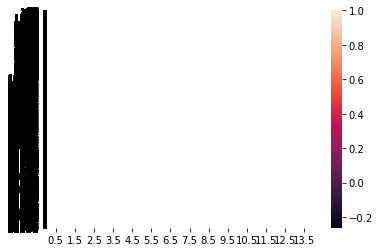

In [9]:
# calculate the correlations
correlations = numeric_df.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=classes, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=classes, annot=True)